# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

**Importing Library**

In [2]:
import pandas as pd

**Importing Dataset**

In [11]:
data_dir = "https://dlsun.github.io/pods/data/"
df = pd.read_csv(data_dir + "titanic.csv")
df

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


**Finging Unique Values of Class**

In [5]:
df['class'].unique()

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew',
       'restaurant staff', 'deck crew'], dtype=object)

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [6]:
passFilter = df[(df['class'] == '3rd') | (df['class']=='2nd') | (df['class'] == '1st')]['class']

**Joint Distribution**

In [7]:
crossTab = pd.crosstab(passFilter,df['embarked'])
crossTab

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [8]:
conDiv = crossTab.div(crossTab.sum(axis=1), axis=0)
conDiv

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


* What proportion of 3rd class passengers embarked at Southampton?
    69.6%
* What proportion of Southampton passengers were in 3rd class?
    69.6%

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

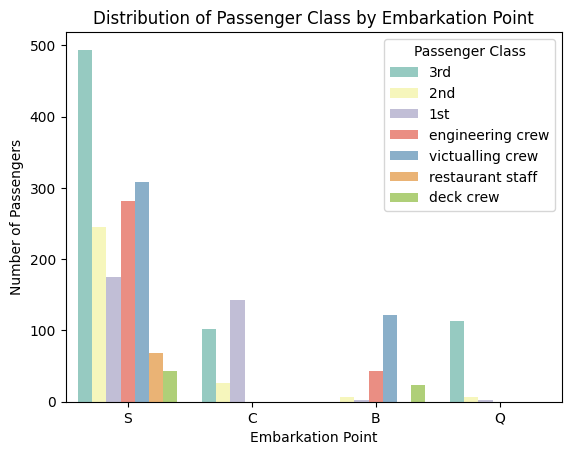

In [10]:
# sns.countplot(x='class', data = df)
sns.countplot(data=df, x='embarked', hue='class', palette='Set3')
plt.title('Distribution of Passenger Class by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.legend(title='Passenger Class', loc='upper right')